<a href="https://colab.research.google.com/github/mathcarl/Computational-AI/blob/main/AI_assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Credit_N400_p9.csv to Credit_N400_p9.csv


In [4]:
import io
credit = pd.read_csv(io.BytesIO(uploaded['Credit_N400_p9.csv']))

In [5]:
credit = credit.sample(frac=1).reset_index(drop=True) # sample without replacement and fraction of axis 1. reset index to default


In [6]:
#assign categorical values to classes 
credit['Gender']=credit['Gender'].astype('category')
credit['Student']=credit['Student'].astype('category')
credit['Married']=credit['Married'].astype('category')
cat_columns=credit.select_dtypes(['category']).columns
credit[cat_columns]=credit[cat_columns].apply(lambda x:x.cat.codes)

In [7]:
#create variables
X=credit.drop(['Balance'],axis=1) 
y=credit['Balance']

In [ ]:
credit.head() # explore data

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,31.367,1829,162,4,30,10,1,0,1,0
1,76.782,5977,429,4,44,12,1,0,1,548
2,23.793,3821,281,4,56,12,0,1,1,868
3,158.889,11589,805,1,62,17,0,0,1,1448
4,49.166,6662,508,3,68,14,0,0,0,984


In [ ]:
len(credit)

400

In [8]:
# create function for standardize and centering the data
def standardize(X):
  credit1=(X-X.mean())/X.std()
  return credit1
def centered_y(y):
  credit2=y-y.mean()
  return credit2

In [ ]:
# standardize X and center Y
X=standardize(X)
y=centered_y(y)

In [ ]:
X.head() # print standaridize data

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married
0,-0.393025,-1.259250,-1.246993,0.760241,-1.487988,-1.103927,1.034339,-0.332916,0.794400
1,0.895553,0.537822,0.478658,0.760241,-0.676384,-0.463969,1.034339,-0.332916,0.794400
2,-0.607925,-0.396240,-0.477883,0.760241,0.019276,-0.463969,-0.964384,2.996248,0.794400
3,3.225208,2.969155,2.908790,-1.427504,0.367106,1.135925,-0.964384,-0.332916,0.794400
4,0.111993,0.834590,0.989244,0.030993,0.714936,0.175988,-0.964384,-0.332916,-1.255665


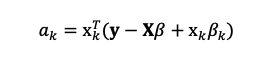

In [9]:


# Function for coordinate decent
def cd_solver(X,y,lamb,alpha,iter=1000):
  n_samples,n_features=X.shape
  a=np.zeros(9) #  save Location for a
  b=np.zeros(9) # save location for b
  b=(X**2).sum(axis=0) # sum of bk
  beta=np.random.uniform(-1,1,X.shape[1])
  for i in range(iter):
    #looping thru each coordinate
    for k in range(n_features):
      #vectorized implementation
      X_k = X.iloc[:,k]# goes over every value in a row
      xsbeta=np.dot(X,beta)
      prediction=y-xsbeta
     
      a[k]= (X_k.T)@(prediction + beta[k]*X_k) # save ak for every value of k
      
      
     
      Bk=np.sign(a[k])*max(np.abs(a[k])-(lamb*(1-alpha))/2,0)
      dem=b[k]+(lamb*alpha)
      beta[k]=Bk/dem # save beta for every k
      
  return beta




#Deliverable 1: 
Illustrate the effect of the tuning parameter on the inferred elastic net regression coefficients by generating six plots (one for each 𝛼 value) of nine lines (one for
̂
each of the 𝑝 = 9 features), with the 𝑦-axis as 𝛽 , 𝑗 = 1,2,...,9, and the 𝑥-axis the
 ̂ corresponding log-scaled tuning parameter value log (𝜆) that generated the particular 𝛽 .
10 𝑗 Label both axes in all six plots. Without the log scaling of the tuning parameter 𝜆, the plots
will look distorted.

In [ ]:
# Run Coordinate decent for ever lambda and alpha
lambdas=[10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6]
beta_list=[]

    
beta_list=[cd_solver(X,y,lamb,0) for lamb in lambdas] # alpha 0

     
      

     


In [ ]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas

In [ ]:
lambdas=[10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6]
beta_list2=[] # save it to a list

    
beta_list2=[cd_solver(X,y,lamb,0.2) for lamb in lambdas] # alpha .2
betas2=pd.DataFrame(beta_list2)#
betas2.index=lambdas
     
      

     


In [ ]:
lambdas=[10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6]
beta_list4=[] # save it to a list

   

beta_list4=[cd_solver(X,y,lamb,0.4) for lamb in lambdas] # alpha .4
betas4=pd.DataFrame(beta_list4)
betas4.index=lambdas
     
      

     


In [ ]:
lambdas=[10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6]
beta_list6=[]

   

beta_list6=[cd_solver(X,y,lamb,0.6) for lamb in lambdas] # alpha .6
betas6=pd.DataFrame(beta_list6)
betas6.index=lambdas
     
      

     


In [ ]:
lambdas=[10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6]
beta_list8=[]

   

beta_list8=[cd_solver(X,y,lamb,0.8) for lamb in lambdas] # alpha .8
betas8=pd.DataFrame(beta_list8)
betas8.index=lambdas
     
      

     


In [ ]:
lambdas=[10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6]
beta_list1=[]

   

beta_list1=[cd_solver(X,y,lamb,1) for lamb in lambdas] # alpha 1
betas1=pd.DataFrame(beta_list1)
betas1.index=lambdas
     
      

     


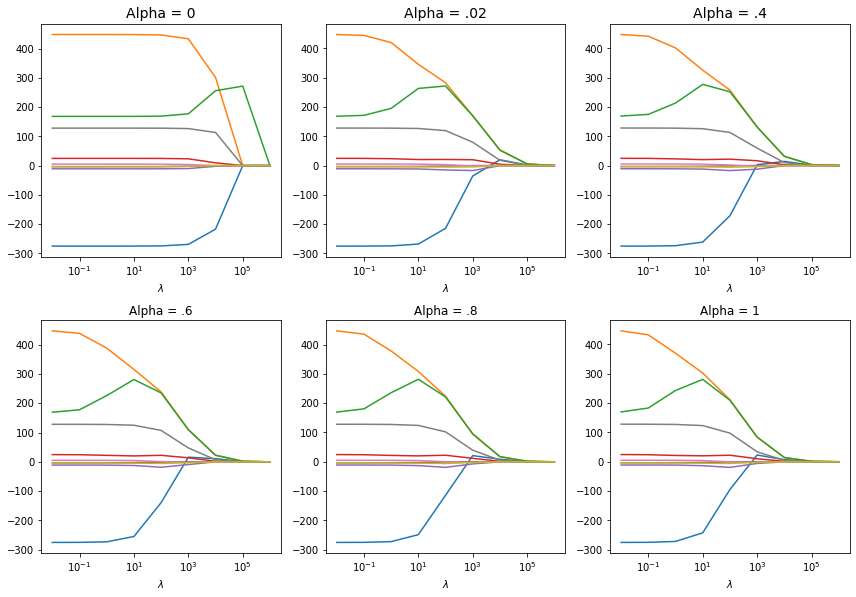

In [ ]:
# creates a sub plot of all alpha values
plt.figure(figsize=(12,12))



plt.subplot(3,3,1)
plt.title('Alpha = 0',fontsize=14)
plt.plot(betas)
plt.xscale('log')
plt.xlabel('$\lambda$')

plt.subplot(3,3,2)
plt.title('Alpha = .02',fontsize=14)
plt.plot(betas2)
plt.xscale('log')
plt.xlabel('$\lambda$')

plt.subplot(3,3,3)
plt.title('Alpha = .4',fontsize=14)
plt.plot(betas4)
plt.xscale('log')
plt.xlabel('$\lambda$')

plt.subplot(3,3,4)
plt.title('Alpha = .6')
plt.plot(betas6)
plt.xscale('log')
plt.xlabel('$\lambda$')

plt.subplot(3,3,5)
plt.title('Alpha = .8')
plt.plot(betas8)
plt.xscale('log')
plt.xlabel("$\lambda$")

plt.subplot(3,3,6)
plt.title('Alpha = 1')
plt.plot(betas1)
plt.xscale('log')
plt.xlabel('$\lambda$')

plt.tight_layout()
plt.show()

#Deliverable 2: 
Illustrate the effect of the tuning parameters on the cross validation error by generating a plot of six lines (one for each 𝛼 value) with the 𝑦-axis as CV error, and the 𝑥-
axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the
particular CV error. Label both axes in the plot. Without the log scaling of the tuning (5)
parameter 𝜆, the plots will look distorted.

In [ ]:
df=credit.sample(frac=1).reset_index(drop=True) # random sample and reset index to the old one

In [ ]:
 # Make a function for split
 def cross_split(X,y,numfold):
      
       
       # Step 1 split the data 80/20
       validation = df[numfold*80:((numfold+1)*80)]
       train = pd.concat([df[:numfold*80],df[((numfold+1)*80):]])
       
       # Select training the data and drop Balance response variable     
       rX_train=train.drop(['Balance'],axis=1)
       ry_train=train['Balance']
       # Step 2 Centralize and standardize the data
       X_train=(rX_train-rX_train.mean())/rX_train.std()
       y_train=ry_train-ry_train.mean()
       # Select validation data and drop the response variable
       rX_val=validation.drop(['Balance'],axis=1)
       ry_val=validation['Balance']
       # centralize and standardize the data
       X_val=(rX_val-rX_train.mean())/rX_train.std()
       y_val=ry_val-ry_train.mean()
       
       return X_train,y_train,X_val,y_val


In [ ]:
# Create function to predict for MSE later on
def predict(val,beta):
  prediction=np.dot(val,beta)
  return prediction

In [ ]:
# create the MSE function to be used after coordinate decent
def mse(y_true,y_pred):
  error=(np.sum((y_true-y_pred)**2))/len(y_true)
  return error

In [ ]:

error_list=[]


# step 3 apply coordinate decent to training values

for i in range(5): # Use the cross split to extract the 5 folds
   X_train,y_train,X_val,y_val=cross_split(X,y,i)
   
   for lamb in lambdas:
      
   

        # apply coordinate to training data
       beta=cd_solver(X_train,y_train,lamb,0)
          
      
  
# step 4 apply MSE      
# apply MSE to the validation data and create a list       
# MSE formula 
       prediction=predict(X_val,beta)
       error=mse(y_val,prediction)
       error_list.append(error)
       errorlist=pd.DataFrame(error_list)
       
       
       
        
      
   
      
      
     


In [ ]:
error1=(error_list[0]+error_list[9]+error_list[18]+error_list[27]+error_list[36])/5
error2=(error_list[1]+error_list[10]+error_list[19]+error_list[28]+error_list[37])/5
error3=(error_list[2]+error_list[11]+error_list[20]+error_list[29]+error_list[38])/5
error4=(error_list[3]+error_list[12]+error_list[21]+error_list[30]+error_list[39])/5
error5=(error_list[4]+error_list[13]+error_list[22]+error_list[31]+error_list[40])/5
error6=(error_list[5]+error_list[14]+error_list[23]+error_list[32]+error_list[41])/5
error7=(error_list[6]+error_list[15]+error_list[24]+error_list[33]+error_list[42])/5
error8=(error_list[7]+error_list[16]+error_list[25]+error_list[34]+error_list[43])/5
error9=(error_list[8]+error_list[17]+error_list[26]+error_list[35]+error_list[44])/5

error_avg=[error1,error2,error3,error4,error5,error6,error7,error8,error9]
errors=pd.DataFrame(error_avg)
print(errors)

               0
0    9918.772928
1    9918.776747
2    9918.754289
3    9918.543578
4    9916.937938
5    9937.525704
6   13078.915563
7   78571.157094
8  211837.834453


In [ ]:

error_list2=[]


# step 3 apply gradient decent to training values

for i in range(5): # Use the cross split to extract the 5 folds
   X_train,y_train,X_val,y_val=cross_split(X,y,i)
   #print(X_train)
   for lamb in lambdas:
       
   
 # loop to go over the seven lambdas 
        # apply coordinate to training data
       beta=cd_solver(X_train,y_train,lamb,.2)
          
      
  
# step 4 apply MSE      
# apply MSE to the validation data and create a list       
# MSE formula 
       prediction=predict(X_val,beta)
       error=mse(y_val,prediction)
       error_list2.append(error)
       
       
       
        
      
   
      
      
     


In [ ]:
error1=(error_list2[0]+error_list2[9]+error_list2[18]+error_list2[27]+error_list2[36])/5
error2=(error_list2[1]+error_list2[10]+error_list2[19]+error_list2[28]+error_list2[37])/5
error3=(error_list2[2]+error_list2[11]+error_list2[20]+error_list2[29]+error_list2[38])/5
error4=(error_list2[3]+error_list2[12]+error_list2[21]+error_list2[30]+error_list2[39])/5
error5=(error_list2[4]+error_list2[13]+error_list2[22]+error_list2[31]+error_list2[40])/5
error6=(error_list2[5]+error_list2[14]+error_list2[23]+error_list2[32]+error_list2[41])/5
error7=(error_list2[6]+error_list2[15]+error_list2[24]+error_list2[33]+error_list2[42])/5
error8=(error_list2[7]+error_list2[16]+error_list2[25]+error_list2[34]+error_list2[43])/5
error9=(error_list2[8]+error_list2[17]+error_list2[26]+error_list2[35]+error_list2[44])/5

error_avg2=[error1,error2,error3,error4,error5,error6,error7,error8,error9]
errors_2=pd.DataFrame(error_avg2)
print(errors_2)

               0
0    9918.700860
1    9918.162807
2    9918.853734
3   10000.906101
4   12561.784756
5   47663.058681
6  140814.195355
7  204733.285238
8  211837.834453


In [ ]:
 
#lambdas=[10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6]
error_list4=[]


# step 3 apply gradient decent to training values

for i in range(5): # Use the cross split to extract the 5 folds
   X_train,y_train,X_val,y_val=cross_split(X,y,i)
   
   for lamb in lambdas:
    
   
 
        # apply coordinate to training data
       beta=cd_solver(X_train,y_train,lamb,.4)
          #beta=betahat
      
  
# step 4 apply MSE      
# apply MSE to the validation data and create a list       
# MSE formula 
       prediction=predict(X_val,beta)
       error=mse(y_val,prediction)
       error_list4.append(error)
       #print(error_list4)
       
       
        
      
   
      
      
     


In [ ]:
error1=(error_list4[0]+error_list4[9]+error_list4[18]+error_list4[27]+error_list4[36])/5
error2=(error_list4[1]+error_list4[10]+error_list4[19]+error_list4[28]+error_list4[37])/5
error3=(error_list4[2]+error_list4[11]+error_list4[20]+error_list4[29]+error_list4[38])/5
error4=(error_list4[3]+error_list4[12]+error_list4[21]+error_list4[30]+error_list4[39])/5
error5=(error_list4[4]+error_list4[13]+error_list4[22]+error_list4[31]+error_list4[40])/5
error6=(error_list4[5]+error_list4[14]+error_list4[23]+error_list4[32]+error_list4[41])/5
error7=(error_list4[6]+error_list4[15]+error_list4[24]+error_list4[33]+error_list4[42])/5
error8=(error_list4[7]+error_list4[16]+error_list4[25]+error_list4[34]+error_list4[43])/5
error9=(error_list4[8]+error_list4[17]+error_list4[26]+error_list4[35]+error_list4[44])/5

error_avg4=[error1,error2,error3,error4,error5,error6,error7,error8,error9]
errors_4=pd.DataFrame(error_avg4)
print(errors_4)

               0
0    9918.639085
1    9917.740498
2    9925.317227
3   10130.933662
4   17091.212060
5   69227.640643
6  167472.680877
7  207679.437355
8  211837.834453


In [ ]:


error_list6=[]


# step 3 apply gradient decent to training values

for i in range(5): # Use the cross split to extract the 5 folds
   X_train,y_train,X_val,y_val=cross_split(X,y,i)
 
   for lamb in lambdas:
  
   
 
       # apply coordinate to training data
       beta=cd_solver(X_train,y_train,lamb,.6)
        
      
  
# step 4 apply MSE      
# apply MSE to the validation data and create a list       
# MSE formula 
       prediction=predict(X_val,beta)
       error=mse(y_val,prediction)
       error_list6.append(error)
       #print(error_list6)
       
       
        
      
   
      
      
     


In [ ]:
error1=(error_list6[0]+error_list6[9]+error_list6[18]+error_list6[27]+error_list6[36])/5
error2=(error_list6[1]+error_list6[10]+error_list6[19]+error_list6[28]+error_list6[37])/5
error3=(error_list6[2]+error_list6[11]+error_list6[20]+error_list6[29]+error_list6[38])/5
error4=(error_list6[3]+error_list6[12]+error_list6[21]+error_list6[30]+error_list6[39])/5
error5=(error_list6[4]+error_list6[13]+error_list6[22]+error_list6[31]+error_list6[40])/5
error6=(error_list6[5]+error_list6[14]+error_list6[23]+error_list6[32]+error_list6[41])/5
error7=(error_list6[6]+error_list6[15]+error_list6[24]+error_list6[33]+error_list6[42])/5
error8=(error_list6[7]+error_list6[16]+error_list6[25]+error_list6[34]+error_list6[43])/5
error9=(error_list6[8]+error_list6[17]+error_list6[26]+error_list6[35]+error_list6[44])/5

error_avg6=[error1,error2,error3,error4,error5,error6,error7,error8,error9]
errors_6=pd.DataFrame(error_avg6)
print(errors_6)

               0
0    9918.559986
1    9917.492068
2    9933.507128
3   10308.337900
4   21853.674245
5   84691.981841
6  179443.592991
7  208671.990680
8  211837.834453


In [ ]:


error_list8=[]


# step 3 apply gradient decent to training values

for i in range(5): # Use the cross split to extract the 5 folds
   X_train,y_train,X_val,y_val=cross_split(X,y,i)
   
   for lamb in lambdas:
       
   
 
        # apply coordinate to training data
        beta=cd_solver(X_train,y_train,lamb,.8)
          
      
  
# step 4 apply MSE      
# apply MSE to the validation data and create a list       
# MSE formula 
        prediction=predict(X_val,beta)
        error=mse(y_val,prediction)
        error_list8.append(error)
       
       
       
        
      
   
      
      
     


In [ ]:
error1=(error_list8[0]+error_list8[9]+error_list8[18]+error_list8[27]+error_list8[36])/5
error2=(error_list8[1]+error_list8[10]+error_list8[19]+error_list8[28]+error_list8[37])/5
error3=(error_list8[2]+error_list8[11]+error_list8[20]+error_list8[29]+error_list8[38])/5
error4=(error_list8[3]+error_list8[12]+error_list8[21]+error_list8[30]+error_list8[39])/5
error5=(error_list8[4]+error_list8[13]+error_list8[22]+error_list8[31]+error_list8[40])/5
error6=(error_list8[5]+error_list8[14]+error_list8[23]+error_list8[32]+error_list8[41])/5
error7=(error_list8[6]+error_list8[15]+error_list8[24]+error_list8[33]+error_list8[42])/5
error8=(error_list8[7]+error_list8[16]+error_list8[25]+error_list8[34]+error_list8[43])/5
error9=(error_list8[8]+error_list8[17]+error_list8[26]+error_list8[35]+error_list8[44])/5

error_avg8=[error1,error2,error3,error4,error5,error6,error7,error8,error9]
errors_8=pd.DataFrame(error_avg8)
print(errors_8)

               0
0    9918.498766
1    9917.391209
2    9942.264899
3   10530.167216
4   26384.511984
5   96832.393556
6  186238.345959
7  209172.338922
8  211785.244803


In [ ]:

error_list1=[]


# step 3 apply coordinate decent to training values

for i in range(5): # Use the cross split to extract the 5 folds
   X_train,y_train,X_val,y_val=cross_split(X,y,i)
   #print(X_train)
   for lamb in lambdas:
       
   
 
        # apply coordinate to training data
       beta=cd_solver(X_train,y_train,lamb,1)
          #beta=betahat
      
  
# step 4 apply MSE      
# apply MSE to the validation data and create a list       
# MSE formula 
       prediction=predict(X_val,beta)
       error=mse(y_val,prediction)
       error_list1.append(error)
       #print(error_list1)
       
       
        
      
   
      
      
     


In [ ]:
error1=(error_list1[0]+error_list1[9]+error_list1[18]+error_list1[27]+error_list1[36])/5
error2=(error_list1[1]+error_list1[10]+error_list1[19]+error_list1[28]+error_list1[37])/5
error3=(error_list1[2]+error_list1[11]+error_list1[20]+error_list1[29]+error_list1[38])/5
error4=(error_list1[3]+error_list1[12]+error_list1[21]+error_list1[30]+error_list1[39])/5
error5=(error_list1[4]+error_list1[13]+error_list1[22]+error_list1[31]+error_list1[40])/5
error6=(error_list1[5]+error_list1[14]+error_list1[23]+error_list1[32]+error_list1[41])/5
error7=(error_list1[6]+error_list1[15]+error_list1[24]+error_list1[33]+error_list1[42])/5
error8=(error_list1[7]+error_list1[16]+error_list1[25]+error_list1[34]+error_list1[43])/5
error9=(error_list1[8]+error_list1[17]+error_list1[26]+error_list1[35]+error_list1[44])/5

error_avg1=[error1,error2,error3,error4,error5,error6,error7,error8,error9]
errors_1=pd.DataFrame(error_avg1)
print(errors_1)

               0
0    9918.437134
1    9917.408047
2    9951.297836
3   10791.415025
4   30573.407561
5  106773.765009
6  190613.063283
7  209482.103208
8  211599.661128


In [ ]:
# List of all the error in the CV by alpha values
errors_pd=pd.concat([errors,errors_2,errors_4,errors_6,errors_8,errors_1],axis=1)
errors_pd.columns=['Alpha=0','Alpha=.2','Alpha=.4','Alpha=.6','Alpha=.8','Alpha=1']
errors_pd=errors_pd.rename(index={0:'10**-2',1:'10**-1',2:'10**0',3:'10**1',4:'10**2',5:'10**3',6:'10**4',7:'10**5',8:'10**6'})

errors_pd

,Alpha=0,Alpha=.2,Alpha=.4,Alpha=.6,Alpha=.8,Alpha=1
10**-2,9918.772928,9918.700860,9918.639085,9918.559986,9918.498766,9918.437134
10**-1,9918.776747,9918.162807,9917.740498,9917.492068,9917.391209,9917.408047
10**0,9918.754289,9918.853734,9925.317227,9933.507128,9942.264899,9951.297836
10**1,9918.543578,10000.906101,10130.933662,10308.337900,10530.167216,10791.415025
10**2,9916.937938,12561.784756,17091.212060,21853.674245,26384.511984,30573.407561
10**3,9937.525704,47663.058681,69227.640643,84691.981841,96832.393556,106773.765009
10**4,13078.915563,140814.195355,167472.680877,179443.592991,186238.345959,190613.063283
10**5,78571.157094,204733.285238,207679.437355,208671.990680,209172.338922,209482.103208
10**6,211837.834453,211837.834453,211837.834453,211837.834453,211785.244803,211599.661128


In [ ]:
errors_pd.idxmin() # Find the min values of each alpha 

Alpha=0      10**2
Alpha=.2    10**-1
Alpha=.4    10**-1
Alpha=.6    10**-1
Alpha=.8    10**-1
Alpha=1     10**-1
dtype: object

In [ ]:
#minimun values of the CV error
print(errors_pd.min())

Alpha=0     9916.937938
Alpha=.2    9918.162807
Alpha=.4    9917.740498
Alpha=.6    9917.492068
Alpha=.8    9917.391209
Alpha=1     9917.408047
dtype: float64


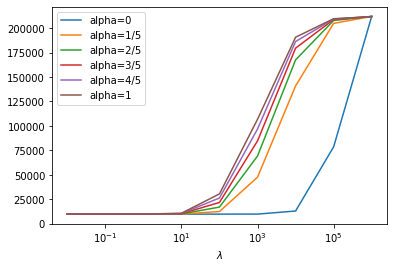

In [ ]:
  plt.plot(lambdas,error_avg,label='alpha=0')
  plt.plot(lambdas,error_avg2,label='alpha=1/5')
  plt.plot(lambdas,error_avg4,label='alpha=2/5')
  plt.plot(lambdas,error_avg6,label='alpha=3/5')
  plt.plot(lambdas,error_avg8,label='alpha=4/5')
  plt.plot(lambdas,error_avg1,label='alpha=1')
  plt.xscale('log')
  plt.xlabel('$\lambda$')
  plt.legend()
  plt.show()


#Deliverable 3: 
Indicate the pair of values 𝜆 and 𝛼 that generated the smallest CV error.
The smallest alpha= 0 and the smallest lambda= 10^2.

#Deliverable 4: 
Given the optimal 𝜆 and 𝛼 pair, retrain your model on the entire dataset of 𝑁 = 400 observations and provide the estimates of the 𝑝 = 9 best-fit model parameters. How do these estimates compare to the estimates obtained from ridge regression (𝛼 = 1 under optimal 𝜆 for 𝛼=1) and lasso (𝛼=0 under optimal 𝜆 for 𝛼 =0) on the entire dataset of 𝑁 = 400 observations?

In [ ]:
# Optimal values for lasso  this is also the optimal values  for cv
lambdas=[10**2]
beta_final=[]

   

beta_final=[cd_solver(X,y,lamb,0) for lamb in lambdas] 
betas_final=pd.DataFrame(beta_final)
betas_final
     
      

     


,0,1,2,3,4,5,6,7,8
0,-7.248001,0.296719,-0.67357,10.047447,-2.546315,-15.935191,-9.777218,417.372676,-30.397389


In [ ]:
# optimal values for ridge regression
lambdas=[10**-1]
beta_final=[]

   

beta_final=[cd_solver(X,y,lamb,1) for lamb in lambdas] 
betas_final=pd.DataFrame(beta_final)
betas_final
     
      

     


,0,1,2,3,4,5,6,7,8
0,-7.241694,0.285999,-0.515747,9.231438,-2.564541,-16.011411,-10.433016,416.907843,-31.446685


Lasso regression is the optimal model for this data set with the smallest value MSE. However, ridge regression MSE value are slighly different as seem previouly. Here in deliveriable 4 we printed both Models Beta Hat and we can only see a slight difference in their values.